In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

(26, 2)


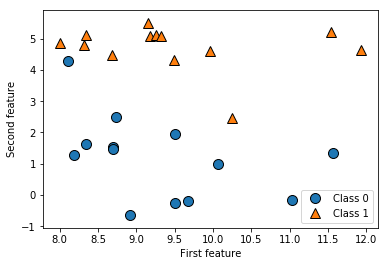

In [38]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0","Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(X.shape)

In [39]:
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [40]:
#書籍とカラムの順番が変わってる
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [41]:
print(np.bincount(cancer.target))

[212 357]


In [42]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [43]:
print(cancer.target_names)

['malignant' 'benign']


In [44]:
print("Sample counts per class:\n{}".format(
    {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [45]:
from sklearn.datasets import load_boston
boston = load_boston()

In [46]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [47]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [48]:
from sklearn.neighbors import  KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [49]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [51]:
print("テストセット精度: {:.2f}".format(clf.score(X_test,y_test)))

テストセット精度: 0.86


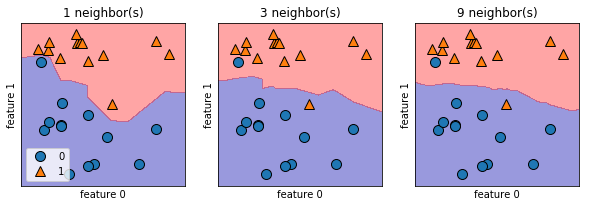

In [52]:
#1行3列の小さい図面、3*10インチの長方形
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


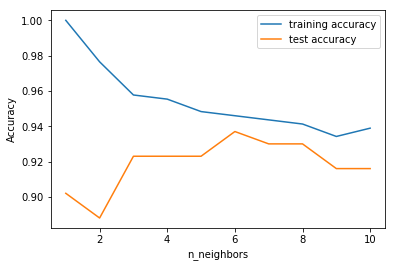

In [53]:
from sklearn.datasets import  load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy =[]
test_accracy = []
#n_neighborsを1~10まで試行
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #model構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #訓練セット精度記録
    training_accuracy.append(clf.score(X_train, y_train))
    #汎化精度記録
    test_accracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [54]:
from sklearn.neighbors import  KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("テストセットに対する精度:\n{}".format(reg.predict(X_test)))

テストセットに対する精度:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


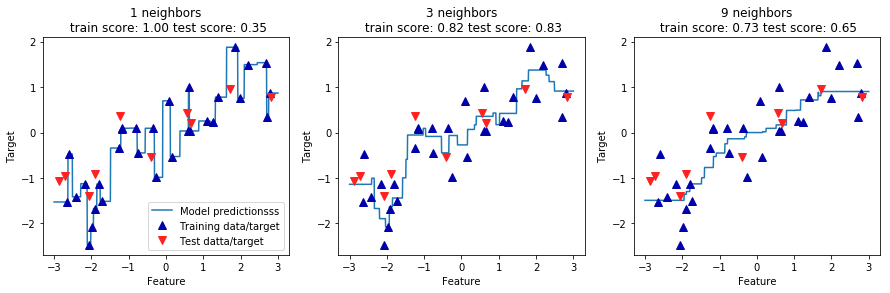

In [55]:
fig, axes= plt.subplots(1,3, figsize=(15,4))

#(-1,1)で列数1だけを指定したことになり、-1指定で行数は自動で調整してくれる。
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8 )
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8 )
    
    ax.set_title(
        "{} neighbors\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictionsss", "Training data/target",
             "Test datta/target"],loc="best")
    

In [56]:
line = np.linspace(-3,3,1000).reshape(-1,1)
line

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

<h2>2.3.3　線形モデル

In [57]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)

[ 0.39390555]
-0.0318043430268


In [58]:
print("訓練セットスコア: {:.2f}".format(lr.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(lr.score(X_test, y_test)))

訓練セットスコア: 0.67
テストセットスコア: 0.66


In [59]:
#boston_housingデータセット
X,y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [60]:
print("訓練セットスコア: {:.2f}".format(lr.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(lr.score(X_test, y_test)))

訓練セットスコア: 0.95
テストセットスコア: 0.61


In [61]:
from sklearn.linear_model import  Ridge

ridge = Ridge().fit(X_train, y_train)
print("訓練セットスコア: {:.2f}".format(ridge.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(ridge.score(X_test, y_test)))

訓練セットスコア: 0.89
テストセットスコア: 0.75


In [62]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("訓練セットスコア: {:.2f}".format(ridge10.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(ridge10.score(X_test, y_test)))

訓練セットスコア: 0.79
テストセットスコア: 0.64


In [63]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("訓練セットスコア: {:.2f}".format(ridge01.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(ridge01.score(X_test, y_test)))

訓練セットスコア: 0.93
テストセットスコア: 0.77


In [64]:
#plt.plot(ridge.coef_, 's')

In [66]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("訓練セットスコア: {:.2f}".format(lasso.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(lasso.score(X_test, y_test)))
print("使用された特徴量数: {}".format(np.sum(lasso.coef_ != 0)))

訓練セットスコア: 0.29
テストセットスコア: 0.21
使用された特徴量数: 4


In [68]:
#max_iterを増やさないと警告
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("訓練セットスコア: {:.2f}".format(lasso001.score(X_train, y_train)))
print("テストセットスコア: {:.2f}".format(lasso001.score(X_test, y_test)))
print("使用された特徴量数: {}".format(np.sum(lasso001.coef_ != 0)))

訓練セットスコア: 0.90
テストセットスコア: 0.77
使用された特徴量数: 33


<h2>2.3.3.5 クラス分類のための線形モデル

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# X, y = mglearn.datasets.make_forge()

#axisの複数形がaxes
# fig, axes = plt.subplots(1,2, figsize=(10, 3))

In [71]:
#ロジスティック回帰をcancerデータセットで解析
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("訓練セットスコア: {:.3f}".format(logreg.score(X_train, y_train)))
print("テストセットスコア: {:.3f}".format(logreg.score(X_test, y_test)))

訓練セットスコア: 0.953
テストセットスコア: 0.958


In [72]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("訓練セットスコア: {:.3f}".format(logreg100.score(X_train, y_train)))
print("テストセットスコア: {:.3f}".format(logreg100.score(X_test, y_test)))

訓練セットスコア: 0.977
テストセットスコア: 0.965


In [73]:
logreg.coef_

array([[  1.87072787e+00,   9.80229597e-02,  -5.45445718e-02,
          8.59191994e-05,  -1.44460569e-01,  -3.76903665e-01,
         -5.68347393e-01,  -2.91592551e-01,  -2.35843933e-01,
         -3.43609414e-02,  -5.75567472e-03,   1.23230942e+00,
          6.14115547e-02,  -9.33382064e-02,  -1.42232208e-02,
         -1.02130153e-02,  -4.33999260e-02,  -3.38460742e-02,
         -4.06881962e-02,   3.60094608e-03,   1.14288745e+00,
         -3.15415317e-01,  -9.52186173e-02,  -2.56539345e-02,
         -2.57047901e-01,  -1.20969715e+00,  -1.55778681e+00,
         -5.96076950e-01,  -7.09698506e-01,  -1.27919136e-01]])

In [74]:
logreg.coef_.T

array([[  1.87072787e+00],
       [  9.80229597e-02],
       [ -5.45445718e-02],
       [  8.59191994e-05],
       [ -1.44460569e-01],
       [ -3.76903665e-01],
       [ -5.68347393e-01],
       [ -2.91592551e-01],
       [ -2.35843933e-01],
       [ -3.43609414e-02],
       [ -5.75567472e-03],
       [  1.23230942e+00],
       [  6.14115547e-02],
       [ -9.33382064e-02],
       [ -1.42232208e-02],
       [ -1.02130153e-02],
       [ -4.33999260e-02],
       [ -3.38460742e-02],
       [ -4.06881962e-02],
       [  3.60094608e-03],
       [  1.14288745e+00],
       [ -3.15415317e-01],
       [ -9.52186173e-02],
       [ -2.56539345e-02],
       [ -2.57047901e-01],
       [ -1.20969715e+00],
       [ -1.55778681e+00],
       [ -5.96076950e-01],
       [ -7.09698506e-01],
       [ -1.27919136e-01]])

In [75]:
cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [77]:
#cancerデータポイントの特徴量は30
cancer.data.shape[1]

30

In [ ]:
#rotation=文字の角度？